In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

occupancy_detection = fetch_ucirepo(id=357) 

X = occupancy_detection.data.features
y = occupancy_detection.data.targets

df = pd.concat([X, y], axis=1)
print("fetch finished")

fetch finished


In [28]:
print(df.isnull().mean())
df = df.dropna()

date             0.000000
Temperature      0.000000
Humidity         0.000000
Light            0.000000
CO2              0.000000
HumidityRatio    0.000000
Occupancy        0.000097
dtype: float64


In [29]:
df['Temperature'] = df['Temperature'].astype(float)
df['Humidity'] = df['Humidity'].astype(float)
df['Light'] = df['Light'].astype(float) 
df['CO2'] = df['CO2'].astype(float)
df['HumidityRatio'] = df['HumidityRatio'].astype(float)

In [30]:
df = df.drop(columns=["date"])

In [25]:
df.info()
df.shape
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 20560 entries, 0 to 20561
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    20560 non-null  float64
 1   Humidity       20560 non-null  float64
 2   Light          20560 non-null  float64
 3   CO2            20560 non-null  float64
 4   HumidityRatio  20560 non-null  float64
 5   Occupancy      20560 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.18,27.2720,426.0,721.25,0.004793,1.0
1,23.15,27.2675,429.5,714.00,0.004783,1.0
2,23.15,27.2450,426.0,713.50,0.004779,1.0
3,23.15,27.2000,426.0,708.25,0.004772,1.0
4,23.10,27.2000,426.0,704.50,0.004757,1.0


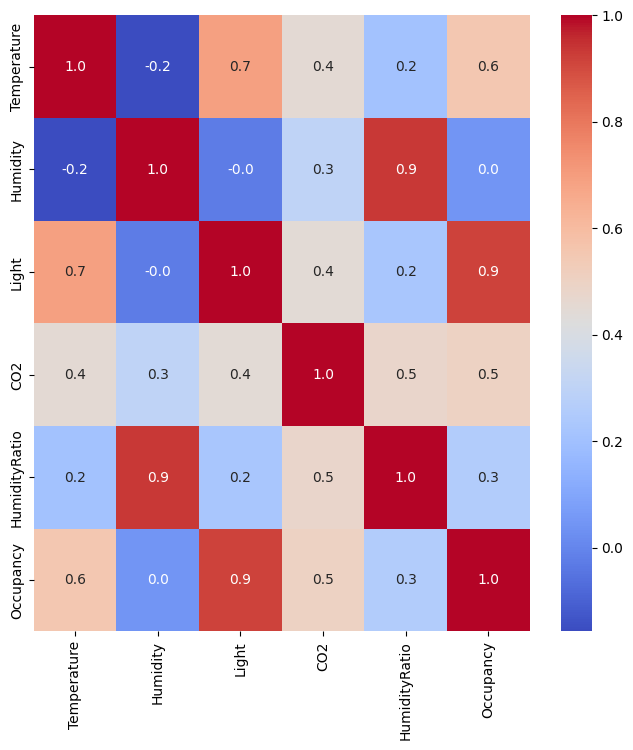

In [33]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".1f")
plt.show()

In [ ]:
for i in range(len(df.columns)-1):
    figure = plt.figure()
    ax = sns.boxplot(x='CO2', y=list(df.columns)[i], data=df)